In [1]:
import numpy as numpy
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import numpy as np

In [2]:
path = "../../results/disco2.npy"
matches = np.load(path, allow_pickle=True)

# Convertir a DataFrame
df = pd.DataFrame(list(matches))    

In [3]:
path = "../../results/no_disco2.npy"
matches2 = np.load(path, allow_pickle=True)

In [4]:
df.sort_values(by='halo_TNG50-1', inplace=True)
df.head()

,subhalo_TNG50-1,halo_TNG50-1,Mvir_TNG50-1,halo_TNG50-2,Mvir_TNG50-2,dist,cost
18,11,0,15167.142578,0,15095.435547,22.914078,0.021655
188,37,0,15167.142578,0,15095.435547,22.914078,0.021655
332,45,0,15167.142578,0,15095.435547,22.914078,0.021655
41,17,0,15167.142578,0,15095.435547,22.914078,0.021655
309,44,0,15167.142578,0,15095.435547,22.914078,0.021655


In [5]:
# Convertir a DataFrame
df2 = pd.DataFrame(list(matches2))


In [6]:
df2.head()
#len(df2)

,subhalo_TNG50-1,halo_TNG50-1,Mvir_TNG50-1,halo_TNG50-2,Mvir_TNG50-2,dist,cost
0,0,0,15167.142578,0.0,15095.435547,22.914078,0.021655
1,1,0,15167.142578,0.0,15095.435547,22.914078,0.021655
2,2,0,15167.142578,0.0,15095.435547,22.914078,0.021655
3,3,0,15167.142578,0.0,15095.435547,22.914078,0.021655
4,4,0,15167.142578,0.0,15095.435547,22.914078,0.021655


In [19]:
#ver cuántos halos unicos (halos_TNG50-1) hay en df y df2
unique_halos_df = df['halo_TNG50-1'].nunique()
unique_halos_df2 = df2['halo_TNG50-1'].nunique()

print(f"Unique halos in df: {unique_halos_df}")
print(f"Unique halos in df2: {unique_halos_df2}")

Unique halos in df: 108
Unique halos in df2: 431419


In [20]:
df2_range = df2[(df2['Mvir_TNG50-1'] >= df['Mvir_TNG50-1'].min()) & (df2['Mvir_TNG50-1'] <= df['Mvir_TNG50-1'].max())].reset_index(drop=True)

In [21]:
#ver cuántos halos unicos (halos_TNG50-1) hay en df y df2
unique_halos_df = df['halo_TNG50-1'].nunique()
unique_halos_df2 = df2_range['halo_TNG50-1'].nunique()

print(f"Unique halos in df: {unique_halos_df}")
print(f"Unique halos in df2: {unique_halos_df2}")

Unique halos in df: 108
Unique halos in df2: 168


In [7]:
#ver si hay algun duplicado en la columna halo_TNG50-2
df2['halo_TNG50-2'].duplicated().any()

#imprimir los indices de los halos duplicados en la columna halo_TNG50-2 y el numero de veces que se repite cada uno
duplicados = df2['halo_TNG50-2'][df2['halo_TNG50-2'].duplicated(keep=False)]
print(duplicados.value_counts())

halo_TNG50-2
0.0         63856
1.0         32884
3.0         26612
4.0         23497
2.0         20484
            ...  
441481.0        2
605590.0        2
615021.0        2
539043.0        2
823136.0        2
Name: count, Length: 128074, dtype: int64


In [8]:
df2.head()

,subhalo_TNG50-1,halo_TNG50-1,Mvir_TNG50-1,halo_TNG50-2,Mvir_TNG50-2,dist,cost
0,0,0,15167.142578,0.0,15095.435547,22.914078,0.021655
1,1,0,15167.142578,0.0,15095.435547,22.914078,0.021655
2,2,0,15167.142578,0.0,15095.435547,22.914078,0.021655
3,3,0,15167.142578,0.0,15095.435547,22.914078,0.021655
4,4,0,15167.142578,0.0,15095.435547,22.914078,0.021655


In [9]:
len(df2[(df2['Mvir_TNG50-1']>=df['Mvir_TNG50-1'].min())&(df2['Mvir_TNG50-1']<=df['Mvir_TNG50-1'].max())]['halo_TNG50-1'].unique())

168

No hay duplicados en este dataframe en TNG50-1 (se buscaron directamente los halos fof y no los subhalos como en el anterior)

In [10]:
#filtrar por halos con masa mayor a 1 en TNG50-1
df = df[df['Mvir_TNG50-1'] > 0]
#filtrar por halos con masa mayor a 1 en TNG50-1
df2 = df2[df2['Mvir_TNG50-1'] > 0]

#filtrar por halos con masa mayor a 1 en TNG50-2
df = df[df['Mvir_TNG50-2'] > 0]
#filtrar por halos con masa mayor a 1 en TNG50-2
df2 = df2[df2['Mvir_TNG50-2'] > 0]


In [11]:
#juntar los dos dataframes
df_combined = pd.concat([df, df2])
#solo graficar la masa de halos unicos en TNG50-1 (es decir que no se repitan los halos con mismo id)


In [12]:
df_noduplicates = df_combined.copy()
df_noduplicates = df_noduplicates.drop_duplicates(subset=['halo_TNG50-1'])

In [13]:
df_noduplicates['halo_TNG50-2'].duplicated(keep=False)

18         False
371        False
373        False
10         False
24         False
           ...  
5677478    False
5678677     True
5683148    False
5684570     True
5687165    False
Name: halo_TNG50-2, Length: 431419, dtype: bool

In [46]:
#imprimir los indices duplicados en el dataframe combinado en TNG50-2 y el numero de veces que se repite cada uno
duplicados_combined = df_noduplicates['halo_TNG50-2'][df_noduplicates['halo_TNG50-2'].duplicated(keep=False)]
print(duplicados_combined.value_counts())

halo_TNG50-2
763595.0    3
236247.0    3
507857.0    3
250223.0    3
82276.0     3
           ..
809282.0    2
250025.0    2
225656.0    2
190948.0    2
482773.0    2
Name: count, Length: 4487, dtype: int64


/home/andres/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/andres/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


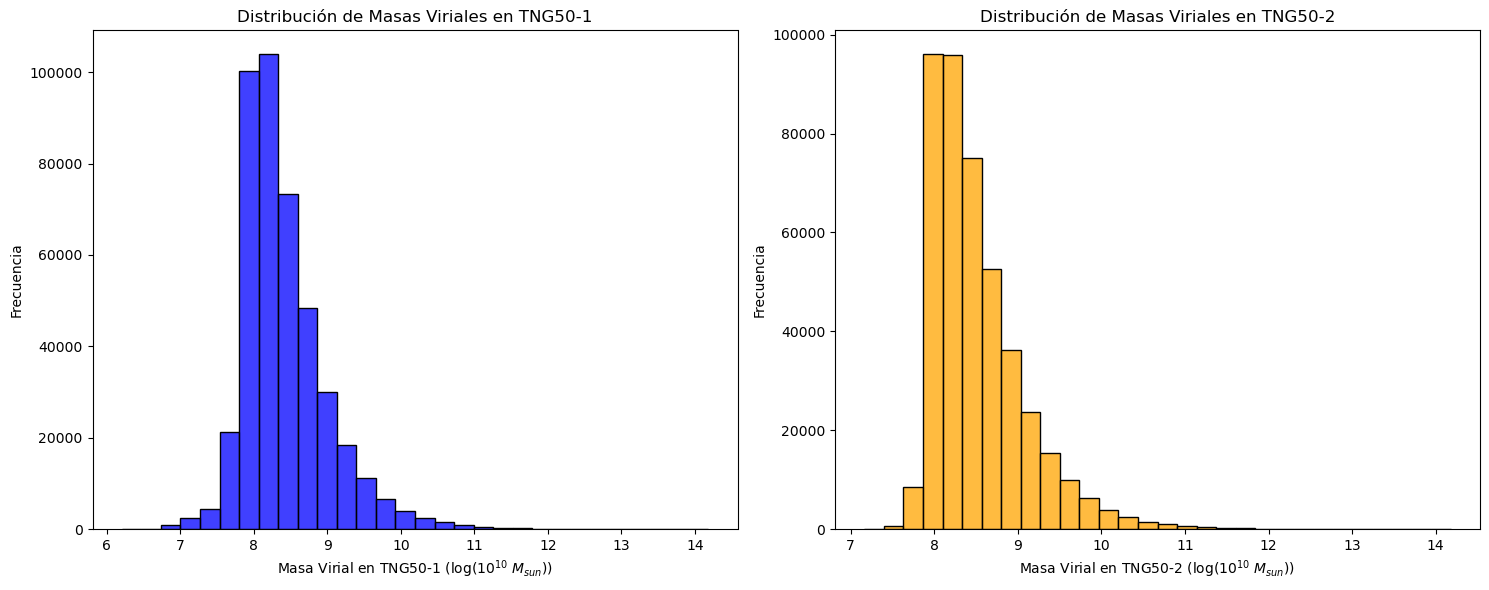

In [12]:
import seaborn as sns
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
# Graficar histograma de la columna Mvir_TNG50-1
sns.histplot(np.log10(df_noduplicates['Mvir_TNG50-1']*10**10), bins=30,
                ax=axs[0], color='blue')
axs[0].set_xlabel('Masa Virial en TNG50-1 (log($10^{10}$ $M_{sun}$))')
axs[0].set_ylabel('Frecuencia')
axs[0].set_title('Distribución de Masas Viriales en TNG50-1')

# Graficar histograma de la columna Mvir_TNG50-2
sns.histplot(np.log10(df_noduplicates['Mvir_TNG50-2']*10**10), bins=30,
                ax=axs[1], color='orange')
axs[1].set_xlabel('Masa Virial en TNG50-2 (log($10^{10}$ $M_{sun}$))')
axs[1].set_ylabel('Frecuencia')
axs[1].set_title('Distribución de Masas Viriales en TNG50-2')
plt.tight_layout()
plt.show()

In [13]:
df_combined.columns

Index(['subhalo_TNG50-1', 'halo_TNG50-1', 'Mvir_TNG50-1', 'halo_TNG50-2',
       'Mvir_TNG50-2', 'dist', 'cost'],
      dtype='object')

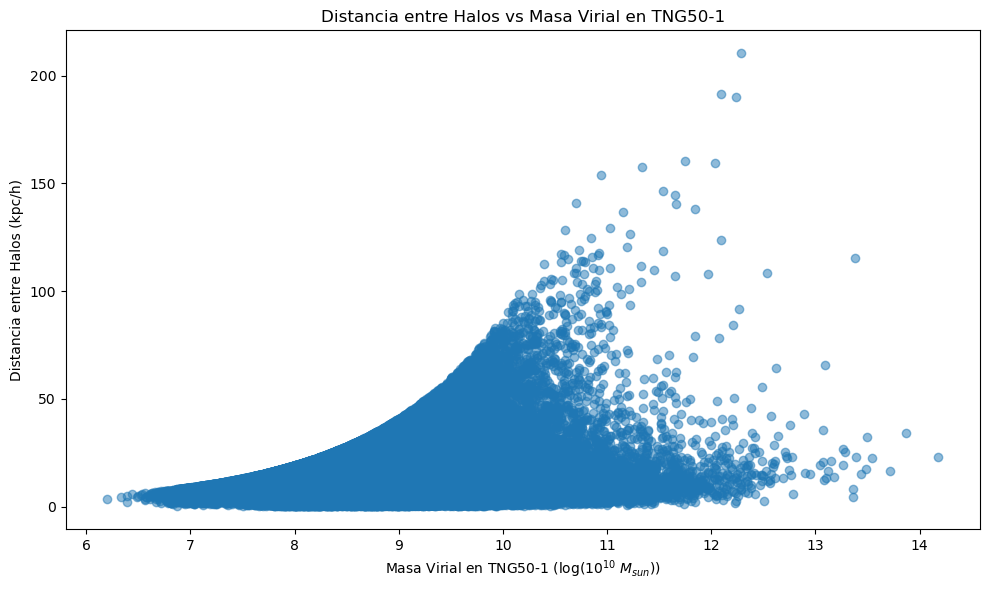

In [14]:
#grafica distancia (dist) entre halos como funcion de la masa del halo en TNG50-1
plt.figure(figsize=(10,6))
plt.scatter(np.log10(df_noduplicates['Mvir_TNG50-1']*10**10), df_noduplicates['dist'], alpha=0.5)
plt.xlabel('Masa Virial en TNG50-1 (log($10^{10}$ $M_{sun}$))')
plt.ylabel('Distancia entre Halos (kpc/h)')
plt.title('Distancia entre Halos vs Masa Virial en TNG50-1')
plt.tight_layout()
plt.show()

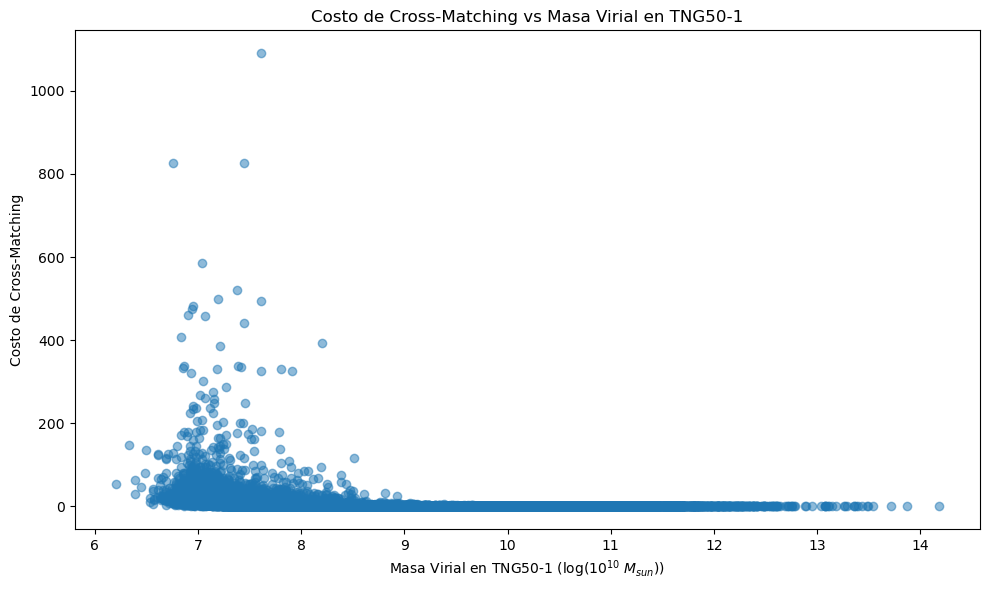

In [15]:
#grafica de costo como funcion de la masa del halo en TNG50-1
plt.figure(figsize=(10,6))
plt.scatter(np.log10(df_noduplicates['Mvir_TNG50-1']*10**10), df_noduplicates['cost'], alpha=0.5)
plt.xlabel('Masa Virial en TNG50-1 (log($10^{10}$ $M_{sun}$))')
plt.ylabel('Costo de Cross-Matching')
plt.title('Costo de Cross-Matching vs Masa Virial en TNG50-1')
plt.tight_layout()
plt.show()

In [ ]:
df_noduplicates.head()

,subhalo_TNG50-1,halo_TNG50-1,Mvir_TNG50-1,halo_TNG50-2,Mvir_TNG50-2,dist,cost
0,117251,3,3470.526367,3.0,3474.905273,22.514030,0.033970
18,11,0,15167.142578,0.0,15095.435547,22.914078,0.021655
19,143881,4,3142.989746,4.0,3279.320801,32.075371,0.066185
34,167393,5,1859.250610,5.0,1844.443115,26.898331,0.050569
42,184932,6,3027.909180,6.0,3006.941162,17.223150,0.028046


In [15]:
#tomar solo un rango de masas entre la masa minima y maxima de df (halos con disco)
df_filtered = df_combined.copy()
df_filtered = df_filtered[(df_filtered['Mvir_TNG50-1'] >= df['Mvir_TNG50-1'].min()) & (df_filtered['Mvir_TNG50-1'] <= df['Mvir_TNG50-1'].max())].reset_index(drop=True)
len(df_filtered)

512847

In [16]:
print(df['Mvir_TNG50-1'].min(), df['Mvir_TNG50-1'].max())

107.66678619384766 15167.142578125


## Aca está el filtro de masas de los halos sin disco 

In [20]:
#añadir una columna que indique si el halo tiene disco o no
df_filtered['has_disk'] = df_filtered['halo_TNG50-1'].isin(df['halo_TNG50-1']).astype(int)
df_filtered['has_disk'].value_counts()

has_disk
1    409465
0     39518
Name: count, dtype: int64

In [ ]:
df_test = df_filtered.copy()
df_test = df_test.drop(columns=['dist', 'cost'])

df_test.head()

,subhalo_TNG50-1,halo_TNG50-1,Mvir_TNG50-1,halo_TNG50-2,Mvir_TNG50-2,has_disk
0,117251,3,3470.526367,3.0,3474.905273,1
1,117254,3,3470.526367,3.0,3474.905273,1
2,117255,3,3470.526367,3.0,3474.905273,1
3,117256,3,3470.526367,3.0,3474.905273,1
4,117257,3,3470.526367,3.0,3474.905273,1


In [48]:
df_test_noduplicates = df_test.drop_duplicates(subset='halo_TNG50-1')

df_test_noduplicates['has_disk'].value_counts() 

has_disk
1    107
0     60
Name: count, dtype: int64

In [26]:
df_test_noduplicates

,subhalo_TNG50-1,halo_TNG50-1,Mvir_TNG50-1,halo_TNG50-2,Mvir_TNG50-2,has_disk
0,117251,3,3470.526367,3.0,3474.905273,1
18,143881,4,3142.989746,4.0,3279.320801,1
33,167393,5,1859.250610,5.0,1844.443115,1
40,184932,6,3027.909180,6.0,3006.941162,1
50,198183,7,2737.067871,7.0,2802.168945,1
...,...,...,...,...,...,...
446668,517271,174,112.801003,158.0,125.487602,0
447296,517899,175,118.142410,146.0,140.893417,0
447517,518682,177,111.006058,166.0,119.135605,0
448146,523548,186,110.867027,155.0,133.841385,0


In [27]:
#imprimir indices de los duplicados en TNG50-2 en el dataframe df_test_noduplicates
df_test_noduplicates['halo_TNG50-2'].duplicated().any()


False

In [28]:
#escribir un archivo csv con el dataframe df_test_noduplicates
df_test_noduplicates.to_csv('../../results/halos_matched_disk_noduplicates2.csv', index=False)